#### Import libraries

In [1]:
import os
import sys
import pandas as pd
import yfinance as yf
import plotly as px

#### Current working directory

In [2]:
#current working directory
current_dir=os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir=os.path.dirname(current_dir)
print(parent_dir)
sys.path.append(parent_dir)

c:\10acadamy\week1\financial-data-analysis\notebooks
c:\10acadamy\week1\financial-data-analysis


In [6]:
from scripts.financial_analyzer import FinancialAnalyzer,GeneralConfiguration

In [8]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

dataframe=GeneralConfiguration.read_csv_file('../dataset/raw_analyst_ratings.csv')
dataframe.head()    # show some data of the dataset
# msft=yf.ticker("MSFT")
# hist=msft.history(period='max')
# fig=make_subplots(rows=1,cols=4,subplot_titles=['Close','Open','High','Low'])
# fig.add_trace(go.Scatter(x=hist.index,y=hist['Close']),row=1,col=1)
# fig.add_trace(go.Scatter(x=hist.index,y=hist['Open']),row=1,col=2)
# fig.add_trace(go.Scatter(x=hist.index,y=hist['High']),row=1,col=3)
# fig.add_trace(go.Scatter(x=hist.index,y=hist['Low']),row=1,col=4)

# fig.update_layout(height=400,width=1200,title_text="Microsoft Stock Analysis")
# fig.show()


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
# verify the column names
print(dataframe.columns)

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [14]:
print(dataframe.dtypes)

headline     object
url          object
publisher    object
date         object
stock        object
dtype: object


In [19]:
# set the datatype for each column
convert_dict = {'headline': str, 'url': str,'publisher':str,'stock':str}   # Define the conversion dictionary

# Convert columns using the dictionary
dataframe = dataframe.astype(convert_dict)
# Convert the 'date' column to datetime
dataframe['date'] = pd.to_datetime(dataframe['date'])

In [16]:
# data shape
dataframe.shape

(1407328, 5)

c:\10acadamy\week1\financial-data-analysis\.venv-week1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


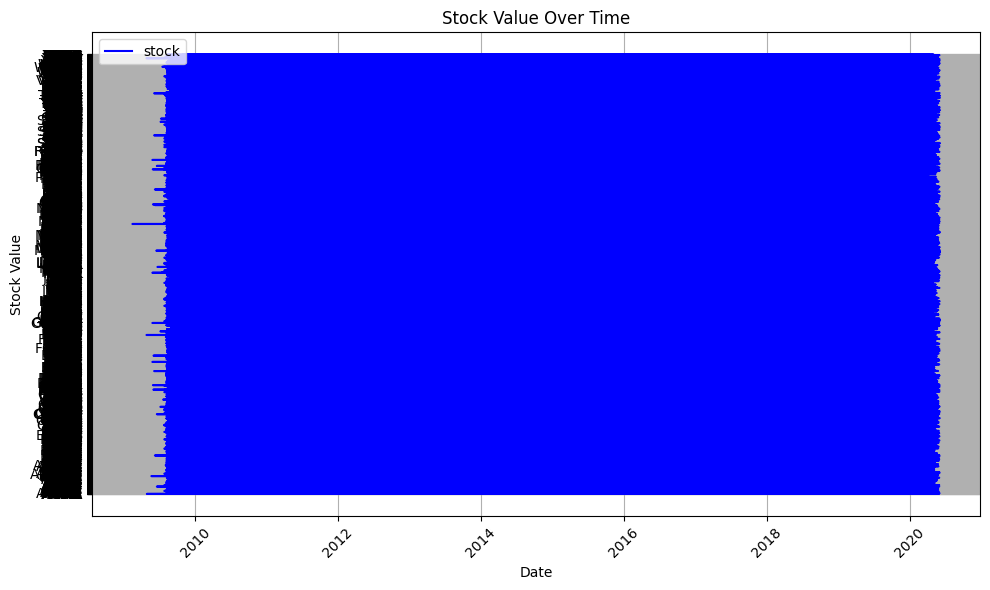

In [17]:
from scripts.financial_analyzer import PlotGraph

PlotGraph.plot_stock_data(dataframe,'date','stock')

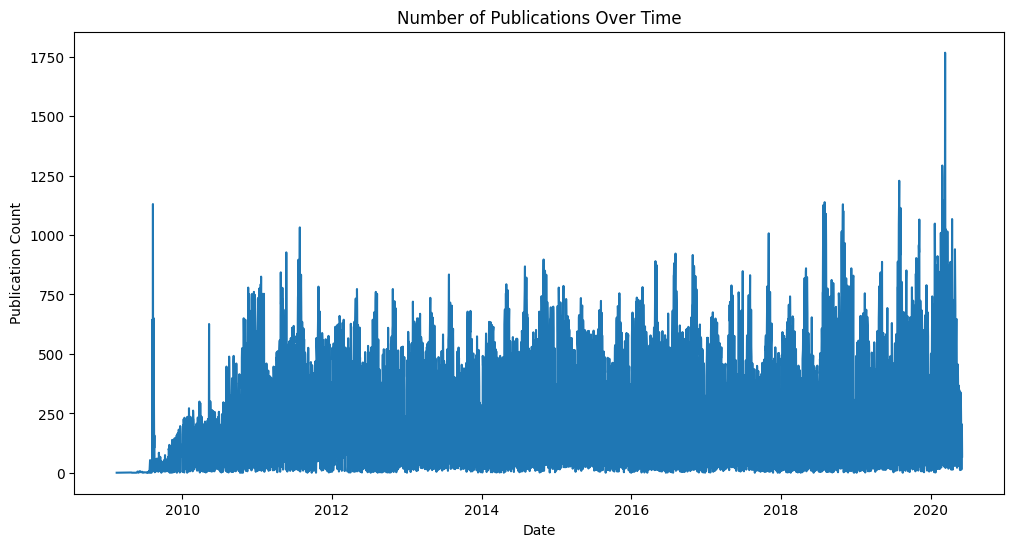

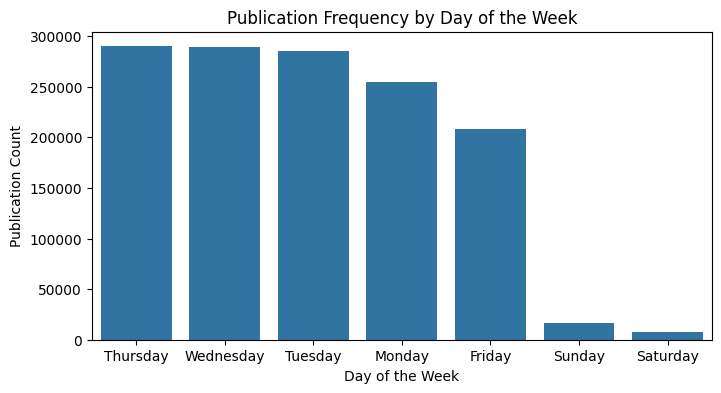

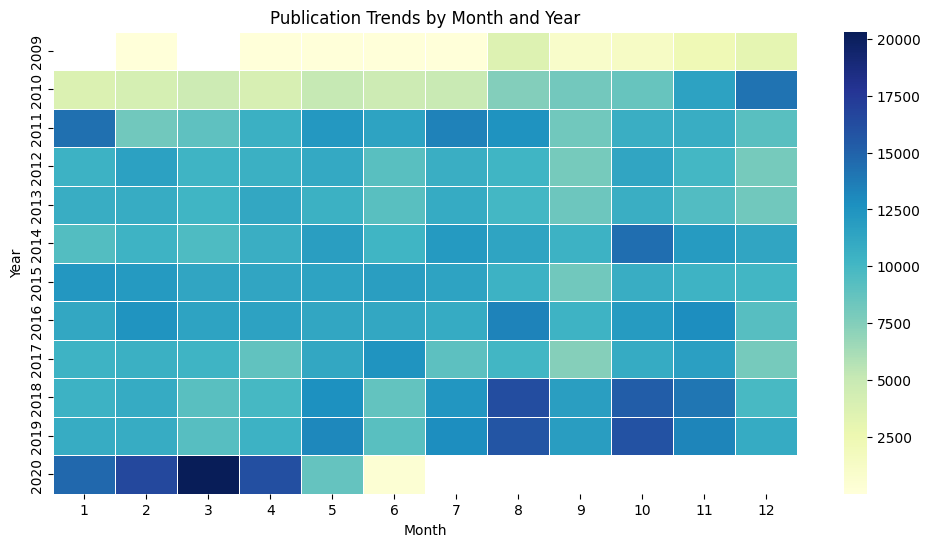

Top 5 Days with Highest Publication Frequency:
day
2020-03-12    1766
2020-02-27    1292
2020-02-28    1239
2019-08-01    1228
2020-03-06    1147
dtype: int64


In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
# Extract useful date features
dataframe['year'] = dataframe['date'].dt.year
dataframe['month'] = dataframe['date'].dt.month
dataframe['day_of_week'] = dataframe['date'].dt.day_name()
dataframe['day'] = dataframe['date'].dt.date  # Useful for daily counts

# 1. Count publications by day
daily_counts = dataframe.groupby('day').size()

# Plot the daily trend
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title("Number of Publications Over Time")
plt.xlabel("Date")
plt.ylabel("Publication Count")
plt.show()

# 2. Analyze publication frequency by day of the week
day_of_week_counts = dataframe['day_of_week'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title("Publication Frequency by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Publication Count")
plt.show()

# 3. Analyze publication trends by month and year
monthly_counts = dataframe.groupby(['year', 'month']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_counts, annot=False, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Publication Trends by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

# 4. Identify spikes in publication frequency
# Find days with the most publications
top_days = daily_counts.sort_values(ascending=False).head(5)
print("Top 5 Days with Highest Publication Frequency:")
print(top_days)